In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline

import sys
sys.path.append("../")
from electronfactors.ellipse.centre import FindCentre
from electronfactors.ellipse.sectorintegration import sector_integration


circle_diameter = np.array([3, 4, 5, 6, 7, 8, 9])
circle_factors = np.array(
    [0.9296, 0.9562, 0.9705, 0.9858, 1.0032, 1.0067, 1.0084])


def circle_fit(radii):

    circle_radii = circle_diameter/2

    spline = UnivariateSpline(circle_radii, circle_factors)
    results = spline(radii)

    results[radii > np.max(circle_radii)] = np.max(circle_factors)
    results[radii < np.min(circle_radii)] = 0

    return results

In [12]:
XCoords = np.array([-1,-0.2,0,0.7,1,0])*4 + 1
YCoords = np.array([0,-1,-.8,0,.6,1])*4 - 1

In [14]:
import descartes as des

import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

In [18]:
centre = FindCentre(
    x=XCoords, y=YCoords, n=3, circle_fit=circle_fit, min_distance=1.5, sectors=200, confidence=0.0001, debug=True
)
centre.centre

Successes: 1
Coords: (0.919500, -0.624246)
Minimise Function: -0.991079
Distance: 2.415233
Factor: 0.991079
 
Successes: 2
Coords: (0.922449, -0.620218)
Minimise Function: -0.991079
Distance: 2.415666
Factor: 0.991079
 
Successes: 3
Coords: (0.923421, -0.621633)
Minimise Function: -0.991079
Distance: 2.414003
Factor: 0.991079
 


array([ 0.9194996 , -0.62424574])

(-4.0, 6.0, -6.0, 4.0)

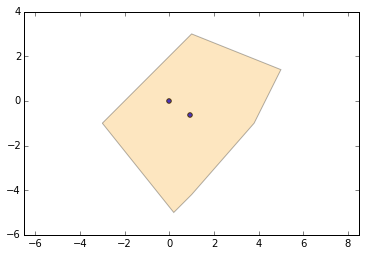

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

patch = des.PolygonPatch(centre.cutout, fc=np.random.uniform(size=3), alpha=0.3)
ax.add_patch(patch)

plt.scatter(*centre.centre)

plt.scatter(0,0)

ax.axis("equal")